In [1]:
import numpy as np
import pandas as pd 
from random import uniform
from fbprophet import Prophet
from matplotlib import pyplot as plt 
%matplotlib inline 

ModuleNotFoundError: No module named 'fbprophet'

In [2]:
######################################################################
######################################################################

In [3]:
fn = "DATA/MOWER SALES TRAIN.csv"
df = pd.read_csv(fn)
print(len(df)) 

144


In [4]:
df.head()

,DATE,SALES
0,1/1/19,0
1,1/2/19,1
2,1/3/19,2
3,1/4/19,3
4,1/5/19,1


In [5]:
df2 = df.copy()
df2.columns = ['ds','y'] 
df2['ds'] = pd.to_datetime(df2['ds']) 

In [6]:
df2.head()

,ds,y
0,2019-01-01,0
1,2019-01-02,1
2,2019-01-03,2
3,2019-01-04,3
4,2019-01-05,1


In [7]:
######################################################################
######################################################################

In [8]:
past_days   =  0
future_days = 60  

In [9]:
m = Prophet( 
    seasonality_mode = 'multiplicative',
    mcmc_samples = 500,
    uncertainty_samples = 500 
)

## Add basic holidays as controls against outliers:
#m.add_country_holidays(country_name='US');

In [10]:
#Prophet?

In [11]:
res = m.fit(df2)
fut = m.make_future_dataframe(future_days)   
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
dates1 = list(fut['ds'])
first_date = dates1[0] 
first_date = str(first_date)[:10] 
dates2 = list(pd.date_range(end=first_date,periods=past_days))[:-1] 
fut0 = pd.DataFrame({'ds': dates2})
fut  = pd.concat([fut0,fut]) 
fut.index = range(len(fut)) 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
f1 = m.predict(fut)

Cols = [
    'ds',
    'yhat_lower',
    'yhat',
    'yhat_upper',  
]

f2 = f1[Cols].copy()  
ForecastDF = f2.copy() 
ForecastDF.index = ForecastDF['ds']  
yhat_df = ForecastDF[['yhat']].copy() 
max_pred = yhat_df['yhat'].max() 

In [13]:
print('Forecast Size:',len(f2)) 

Forecast Size: 204


m.seasonality_prior_scale : 10.0


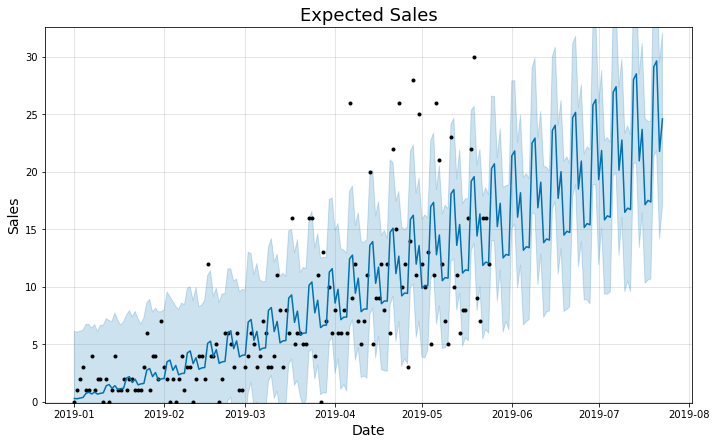

In [14]:
print('m.seasonality_prior_scale :',m.seasonality_prior_scale)
m.plot(f1)
plt.title('Expected Sales',size=18)
plt.xlabel('Date',size=14);
plt.ylabel('Sales',size=14);
plt.ylim([-0.1,max_pred*1.1])
plt.show() 

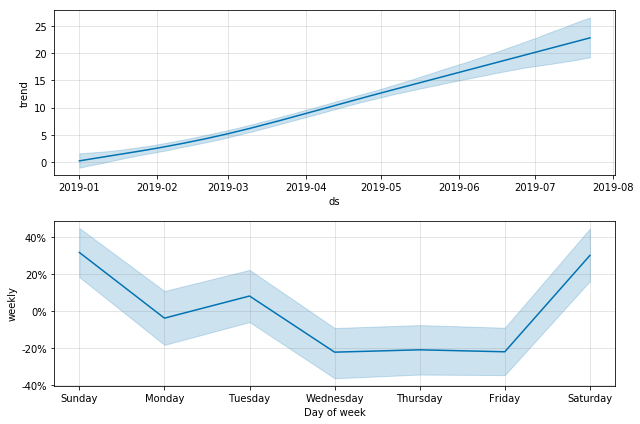

In [15]:
m.plot_components(f1); 

In [16]:
######################################################################
######################################################################

In [ ]:
# [END]